<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px\" align="left">

## Purity Randomized Benchmarking


- Last Updated: June 24, 2019
- Requires: qiskit-terra 0.8, qiskit-ignis 0.1.1, qiskit-aer 0.2

## Introduction

**Purity Randomized Benchmarking** is a variant of the Randomized Benchmarking (RB) method, which quantifies how *coherent* the errors are. The protocol executes the RB sequneces containing of Clifford gates, and then calculates the *purity* $Tr(\rho^2)$ as the sum of all $Z$-correlators, and fits the purity result to an exponentially decaying curve.

This notebook gives an example for how to use the ``ignis.verification.randomized_benchmarking`` module in order to perform purity RB.

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#Import Qiskit classes classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

## Select the Parameters of the Purity RB Run

First, wee need to choose the regular RB parameters:

- **nseeds**: The number of seeds. For each seed there you will get a separate list of output circuits.
- **length_vector**: The length vector of Clifford lengths. Must be in ascending order. RB sequences of increasing length grow on top of the previous sequences.
- **rb_pattern**: A list of the form [[i],[j],[k],...] or [[i,j],[k,l],...], etc. which will make simultaneous RB sequences. All the patterns should have the same dimetion, namely only 1-qubit sequences Qk or only 2-qubit sequences Qi,Qj, etc. The number of qubits is the sum of the entries.
- **length_multiplier = None**: No length_multiplier for purity RB.
- **seed_offset**: What to start the seeds at (e.g. if we want to add more seeds later).
- **align_cliffs**: If true adds a barrier across all qubits in rb_pattern after each set of cliffords.

As well as another parameter for purity RB:

- **is_purity = True**

In this example we have 4 qubits Q0,Q1,Q2,Q3. We are running 2Q RB (on qubits Q0,Q1 and on qubits Q2,Q3) simultaneously. 

In [2]:
# Example of 2-qubits Purity RB
#Number of qubits
nQ = 4
#Number of seeds (random sequences)
nseeds = 3
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = np.arange(1,200,20)
print (len(nCliffs))
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1],[2,3]]

10


## Generate Interleaved RB sequences

We generate purity RB sequences. We start with a small example (so it doesn't take too long to run).

In order to generate the purity RB sequences **rb_purity_circs**, which is a list of lists of lists of quantum circuits, we run the function rb.randomized_benchmarking_seq.

This function returns:

- **rb_purity_circs**: A list of lists of lists of circuits for the purity rb sequences (separate list for each of the $3^n$ options and for each seed).
- **xdata**: The Clifford lengths (with multiplier if applicable).
- **rb_opts_dict**: Option dictionary back out with default options appended.

As well as:

- **npurity**: the number of purity rb circuits (per seed) which equals to $3^n$, where $n$ is the dimension, e.g npurity=3 for 1-qubit RB, npurity=9 for 2-qubit RB.

In order to calculate each of the $3^n$ correlators, we need to do (per each of the $n$ qubits) either:
- nothing (Pauli-$Z$), or
- $\pi/2$-rotation around $x$ (Pauli-$X$), or
- $\pi/2$-rotation around $y$ (Pauli-$Y$),

and then measure the result.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['is_purity'] = True
rb_purity_circs, xdata, npurity = rb.randomized_benchmarking_seq(**rb_opts)
print (npurity)

9


To illustrate, we print the circuit names for purity RB.

In [24]:
for i in range(len(rb_purity_circs)):
    for j in range(len(rb_purity_circs[i])):
        for k in range(len(rb_purity_circs[i][j])):
            print (rb_purity_circs[i][j][k].name)

rb_purity_ZZ_length_0_seed_0
rb_purity_ZZ_length_1_seed_0
rb_purity_ZZ_length_2_seed_0
rb_purity_ZZ_length_3_seed_0
rb_purity_ZZ_length_4_seed_0
rb_purity_ZZ_length_5_seed_0
rb_purity_ZZ_length_6_seed_0
rb_purity_ZZ_length_7_seed_0
rb_purity_ZZ_length_8_seed_0
rb_purity_ZZ_length_9_seed_0
rb_purity_XZ_length_0_seed_0
rb_purity_XZ_length_1_seed_0
rb_purity_XZ_length_2_seed_0
rb_purity_XZ_length_3_seed_0
rb_purity_XZ_length_4_seed_0
rb_purity_XZ_length_5_seed_0
rb_purity_XZ_length_6_seed_0
rb_purity_XZ_length_7_seed_0
rb_purity_XZ_length_8_seed_0
rb_purity_XZ_length_9_seed_0
rb_purity_YZ_length_0_seed_0
rb_purity_YZ_length_1_seed_0
rb_purity_YZ_length_2_seed_0
rb_purity_YZ_length_3_seed_0
rb_purity_YZ_length_4_seed_0
rb_purity_YZ_length_5_seed_0
rb_purity_YZ_length_6_seed_0
rb_purity_YZ_length_7_seed_0
rb_purity_YZ_length_8_seed_0
rb_purity_YZ_length_9_seed_0
rb_purity_ZX_length_0_seed_0
rb_purity_ZX_length_1_seed_0
rb_purity_ZX_length_2_seed_0
rb_purity_ZX_length_3_seed_0
rb_purity_ZX_l

As an example, we print the circuit corresponding to the first RB sequences, for each of the $3^n$ $Z$-correlators.

In [45]:
for i in range(npurity):
    print ("circ no. ", i)
    print (rb_purity_circs[0][i][0])

circ no.  0
                   ┌─────┐┌───┐      ░ ┌───┐┌───┐            ┌─┐              
qr_0: |0>───────■──┤ Sdg ├┤ H ├──────░─┤ H ├┤ S ├────────■───┤M├──────────────
         ┌───┐┌─┴─┐├─────┤├───┤┌───┐ ░ ├───┤├───┤┌───┐ ┌─┴─┐ └╥┘   ┌───┐┌─┐   
qr_1: |0>┤ H ├┤ X ├┤ Sdg ├┤ H ├┤ Z ├─░─┤ Z ├┤ H ├┤ S ├─┤ X ├──╫────┤ H ├┤M├───
         ├───┤├───┤└─────┘├───┤├───┤ ░ ├───┤├───┤└───┘┌┴───┴┐ ║    ├───┤└╥┘┌─┐
qr_2: |0>┤ H ├┤ S ├───■───┤ X ├┤ Z ├─░─┤ Z ├┤ X ├──■──┤ Sdg ├─╫────┤ H ├─╫─┤M├
         ├───┤└───┘ ┌─┴─┐ └─┬─┘├───┤ ░ ├───┤└─┬─┘┌─┴─┐└┬───┬┘ ║ ┌─┐└───┘ ║ └╥┘
qr_3: |0>┤ H ├──────┤ X ├───■──┤ X ├─░─┤ X ├──■──┤ X ├─┤ H ├──╫─┤M├──────╫──╫─
         └───┘      └───┘      └───┘ ░ └───┘     └───┘ └───┘  ║ └╥┘      ║  ║ 
 cr_0: 0 ═════════════════════════════════════════════════════╩══╬═══════╬══╬═
                                                                 ║       ║  ║ 
 cr_1: 0 ════════════════════════════════════════════════════════╬═══════╩══╬═
                                        

                   ┌─────┐┌───┐      ░ ┌───┐┌───┐            ┌────────────┐┌─┐»
qr_0: |0>───────■──┤ Sdg ├┤ H ├──────░─┤ H ├┤ S ├────────■───┤ Ry(1.5708) ├┤M├»
         ┌───┐┌─┴─┐├─────┤├───┤┌───┐ ░ ├───┤├───┤┌───┐ ┌─┴─┐ └───┬───┬────┘└╥┘»
qr_1: |0>┤ H ├┤ X ├┤ Sdg ├┤ H ├┤ Z ├─░─┤ Z ├┤ H ├┤ S ├─┤ X ├─────┤ H ├──────╫─»
         ├───┤├───┤└─────┘├───┤├───┤ ░ ├───┤├───┤└───┘┌┴───┴┐    ├───┤      ║ »
qr_2: |0>┤ H ├┤ S ├───■───┤ X ├┤ Z ├─░─┤ Z ├┤ X ├──■──┤ Sdg ├────┤ H ├──────╫─»
         ├───┤└───┘ ┌─┴─┐ └─┬─┘├───┤ ░ ├───┤└─┬─┘┌─┴─┐└┬───┬┘┌───┴───┴────┐ ║ »
qr_3: |0>┤ H ├──────┤ X ├───■──┤ X ├─░─┤ X ├──■──┤ X ├─┤ H ├─┤ Rx(1.5708) ├─╫─»
         └───┘      └───┘      └───┘ ░ └───┘     └───┘ └───┘ └────────────┘ ║ »
 cr_0: 0 ═══════════════════════════════════════════════════════════════════╩═»
                                                                              »
 cr_1: 0 ═════════════════════════════════════════════════════════════════════»
                                        

## Define the noise model

We define a noise model for the simulator. To simulate decay, we add depolarizing error probabilities to the CNOT and U gates.

In [14]:
noise_model = NoiseModel()
p1Q = 0.002
p2Q = 0.01
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')

We can execute the purity RB sequences either using Qiskit Aer Simulator (with some noise model) or using IBMQ provider, and obtain a list of of list of results result_list (a list per each seed and each of the $3^n$ sequences).

In [15]:
#Execute purity RB circuits 
backend = qiskit.Aer.get_backend('qasm_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
purity_result_list = [[] for d in range(npurity)]
import time
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        print('Executing seed %d purity %d length %d'%(rb_seed, d, len(nCliffs)))
        new_circ = rb_purity_circs[rb_seed][d]
        job = qiskit.execute(new_circ, backend=backend, noise_model=noise_model, basis_gates=['u1','u2','u3','cx'])
        purity_result_list[d].append(job.result())
print("Finished Simulating Purity RB Circuits")

Executing seed 0 purity 0 length 10
Executing seed 0 purity 1 length 10
Executing seed 0 purity 2 length 10
Executing seed 0 purity 3 length 10
Executing seed 0 purity 4 length 10
Executing seed 0 purity 5 length 10
Executing seed 0 purity 6 length 10
Executing seed 0 purity 7 length 10
Executing seed 0 purity 8 length 10
Executing seed 1 purity 0 length 10
Executing seed 1 purity 1 length 10
Executing seed 1 purity 2 length 10
Executing seed 1 purity 3 length 10
Executing seed 1 purity 4 length 10
Executing seed 1 purity 5 length 10
Executing seed 1 purity 6 length 10
Executing seed 1 purity 7 length 10
Executing seed 1 purity 8 length 10
Executing seed 2 purity 0 length 10
Executing seed 2 purity 1 length 10
Executing seed 2 purity 2 length 10
Executing seed 2 purity 3 length 10
Executing seed 2 purity 4 length 10
Executing seed 2 purity 5 length 10
Executing seed 2 purity 6 length 10
Executing seed 2 purity 7 length 10
Executing seed 2 purity 8 length 10
Finished Simulating Purity R

## Fit the results

Calculate the *purity* $Tr(\rho^2)$ as the sum of all $Z$-correlators, and fit the purity result into an exponentially decaying function to obtain $\alpha$.

In [46]:
rbfit_purity = rb.PurityRBFitter(purity_result_list, npurity, xdata, rb_opts['rb_pattern'])

Print the fit result (seperately for each pattern)

In [47]:
rbfit_purity.calc_data()
rbfit_purity.calc_statistics()
rbfit_purity.fit_data()
print (rbfit_purity.fit)

[{'params': array([0.42856602, 0.9786373 , 0.54792707]), 'params_err': array([0.01207333, 0.00118794, 0.00605272]), 'epc': 0.01602202550491058, 'epc_err': 1.9448652803216103e-05}, {'params': array([0.43083653, 0.97632563, 0.555169  ]), 'params_err': array([0.00347657, 0.00078689, 0.00084803]), 'epc': 0.017755774110979394, 'epc_err': 1.4310583901237516e-05}]


## Plot the results and the fit

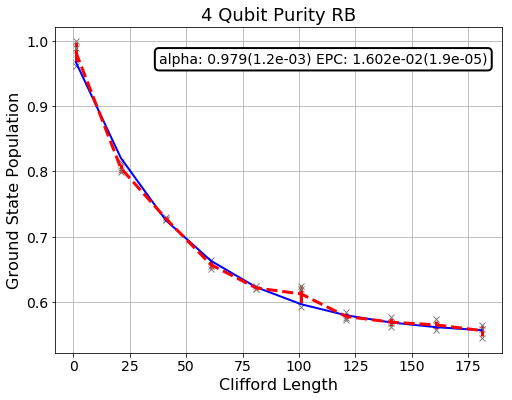

In [48]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rbfit_purity.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit Purity RB'%(nQ), fontsize=18)

plt.show()